In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import norm

(-4, 4)

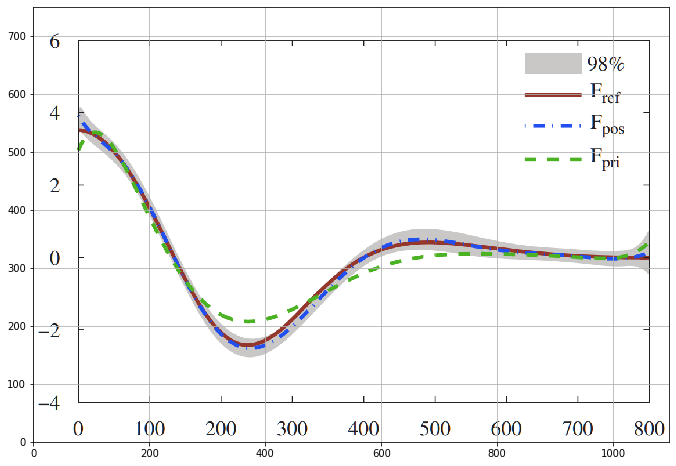

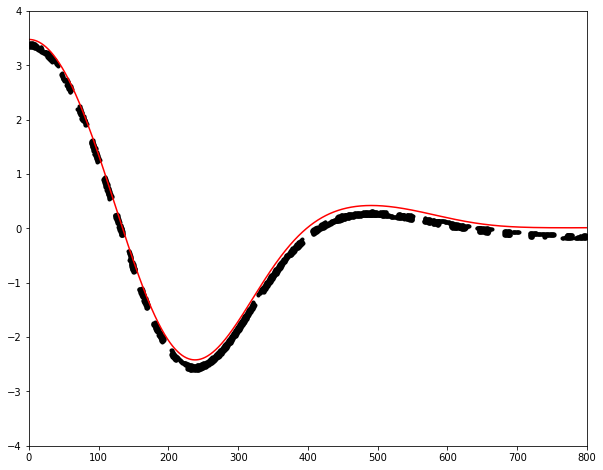

In [2]:
img = cv2.imread('figures/re.png');
img = cv2.flip(img,0)
plt.figure(figsize=(12,8));
plt.imshow(img);
#plt.xlim(75,100); 
plt.ylim(0,750); 
plt.grid();
rgb_k = np.array([0,0,0], dtype='uint8');
rgb_w = np.array([255,255,255], dtype='uint8');
rgb_r = np.array([255,0,0], dtype='uint8');
img[540,80]
xaxis = np.array([77.5,1061]); yaxis = np.array([22.5,646.5]);
len_xaxis = xaxis[1]-xaxis[0]; len_yaxis = yaxis[1]-yaxis[0];
new_img = np.copy(img);
x=[];y=[]
for i in range(22,646):
    for j in range(77,1061):
        if (np.array_equal(img[i,j],img[540,80])):
            new_img[i,j] = rgb_k
            y.append(i); x.append(j);
        else:
            new_img[i,j] = rgb_w
x = (x-xaxis[0])*(800/len_xaxis);
y = (y-xaxis[0])*(10/len_yaxis)-4;
tmin,tmax,dt = 0,2.5,1/5120; time = np.arange(tmin,tmax,dt); N = len(time)
f = open('force.txt','r'); lines = f.readlines();
force = np.zeros(N);
for i in range(len(lines)):
    force[i] = float(lines[i].split()[0])
ft_force = np.fft.fft(force)  / np.sqrt(N/2)
df = 1/tmax; freq = np.zeros(N); 
for i in range(N): freq[i] = i*df;
re_ft_force = np.real(ft_force); im_ft_force = np.imag(ft_force);

plt.figure(figsize=(10,8)); plt.plot(x,y,'k.'); plt.plot(freq,re_ft_force,'r-'); plt.xlim(0,800); plt.ylim(-4,4)

In [3]:
img = cv2.imread('figures/graph.png')

In [4]:
# 이미지 크기 저장
row = img.shape[0]; col = img.shape[1];

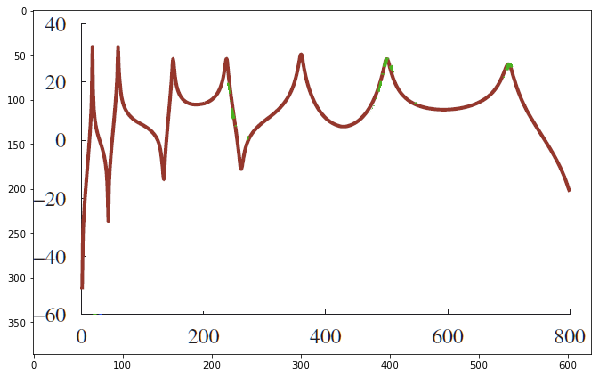

In [5]:
plt.figure(figsize=(10,10)); plt.imshow(img);

In [6]:
# x, y 축 위치
zero_point = np.array([54,341])
yaxis_end = np.array([54,15])
xaxis_end = np.array([603,341])
len_xaxis = xaxis_end[0] - zero_point[0];
len_yaxis = -yaxis_end[1] + zero_point[1];

In [7]:
rgb_k = np.array([0,0,0], dtype='uint8');
rgb_w = np.array([255,255,255], dtype='uint8');
rgb_r = np.array([255,0,0], dtype='uint8');

In [8]:
# 축 삭제한 이미지 불러옴
img_wo_axis = cv2.imread('figures/graph_wo_axis.png')

In [9]:
# 축 내에서 검정색, 흰색 아니면 모두 검정색으로
new_img = np.copy(img_wo_axis );
x=[];y=[]
for i in range(15,341):
    for j in range(54,603):
        if not (np.array_equal(img_wo_axis[i,j],rgb_k)) and not (np.array_equal(img_wo_axis[i,j],rgb_w)):
            new_img[i,j] = rgb_k
            y.append(row-i-1); x.append(j);
        else:
            new_img[i,j] = rgb_w

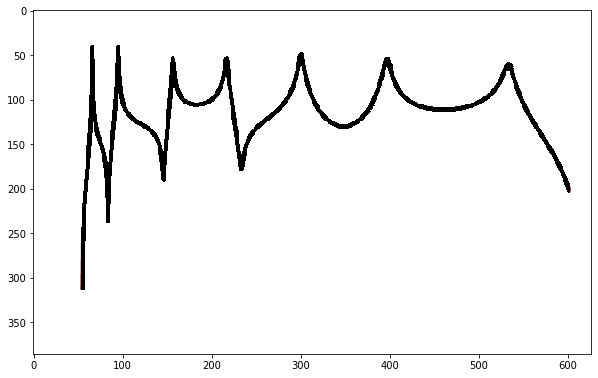

In [10]:
plt.figure(figsize=(10,10)); plt.imshow(new_img);

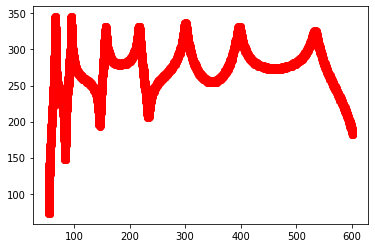

In [11]:
x = np.asarray(x); y = np.asarray(y);
plt.plot(x,y,'ro');

In [12]:
x = (x-54)*(800/len_xaxis);
y = (y-44)*(100/len_yaxis)-60;

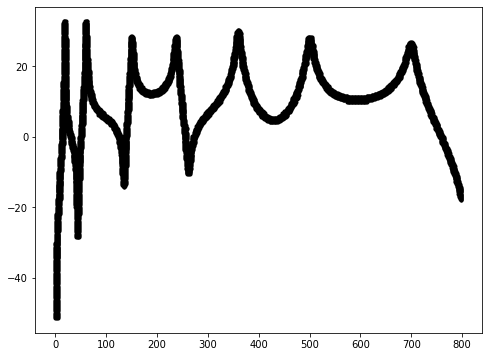

In [13]:
plt.figure(figsize=(8,6)); plt.plot(x,y,'k.');

In [14]:
fn = np.array([17,59,150,238,360,500,700]);
test_H = np.array([32,32,28,28,30,28,26]);
nm = len(fn);

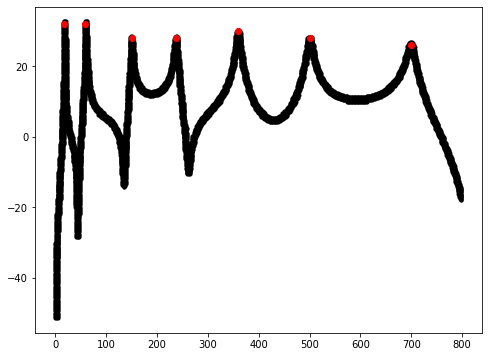

In [15]:
plt.figure(figsize=(8,6)); plt.plot(x,y,'k.');
plt.plot(fn,test_H,'ro');

In [16]:
def H(f,fn,ms,zeta):
    w = 2*np.pi*f; wn = 2*np.pi*fn;
    out = 0;
    nm = len(fn);
    for i in range(nm):
        out += (-w**2)*ms[i] / np.complex(wn[i]**2-w**2,2*zeta*wn[i]*w);
    return out
# dB 계산함수 정의
def dB(acc):
    return 20*np.log10(acc/1e-6);

In [17]:
ms = np.ones(nm)*1e-6;
ms[3] *= -1; ms[4] *= -1; ms[6] *= -1;
ms[0] *= 0.8; ms[1] *= 0.8; ms[2] *= 0.5; ms[3] *= 0.5; ms[4] *= 0.55; ms[5] *= 0.5; ms[6] *= 0.4;

In [18]:
def H(f,fn,ms,zeta):
    w = 2*np.pi*f; wn = 2*np.pi*fn;
    out = 0;
    nm = len(fn);
    for i in range(nm):
        out += (-w**2)*ms[i] / np.complex(wn[i]**2-w**2,2*zeta*wn[i]*w);
    return out

In [20]:
zeta = 0.01;
H1 = np.zeros(len(freq),dtype='complex');
for i in range(len(freq)):
    H1[i] = H(freq[i],fn,ms,zeta)

In [21]:
mag_H1 = np.abs(H1); mag_H1 = dB(mag_H1);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


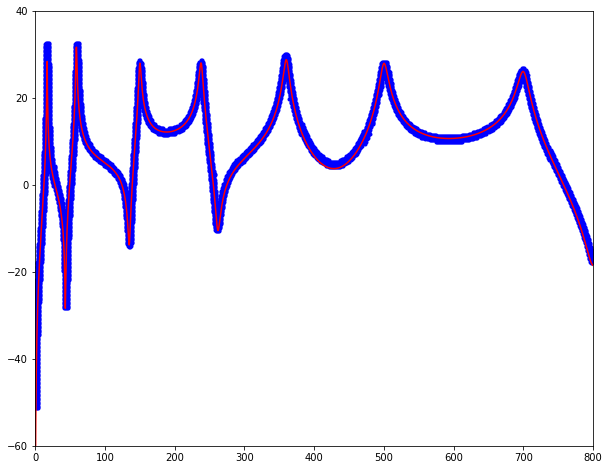

In [22]:
plt.figure(figsize=(10,8)); plt.plot(x,y,'b.');
plt.plot(freq,mag_H1,'r-');
plt.xlim(0,800); plt.ylim(-60,40);